In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 日本語フォント設定（必要に応じて）
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)

# データ読み込み
df = pd.read_csv(r'C:\Users\tetsu\dev\energy-env\data\exploration\power_analysis.csv')

print(f"データ形状: {df.shape}")
print(f"期間: {df['date'].min()} ～ {df['date'].max()}")
print("\n基本情報:")
df.info()

データ形状: (197856, 5)
期間: 2023-01-01 ～ 2025-07-04

基本情報:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197856 entries, 0 to 197855
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          197856 non-null  int64  
 1   month         197856 non-null  int64  
 2   hour          197856 non-null  int64  
 3   actual_power  197856 non-null  float64
 4   date          197856 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 7.5+ MB


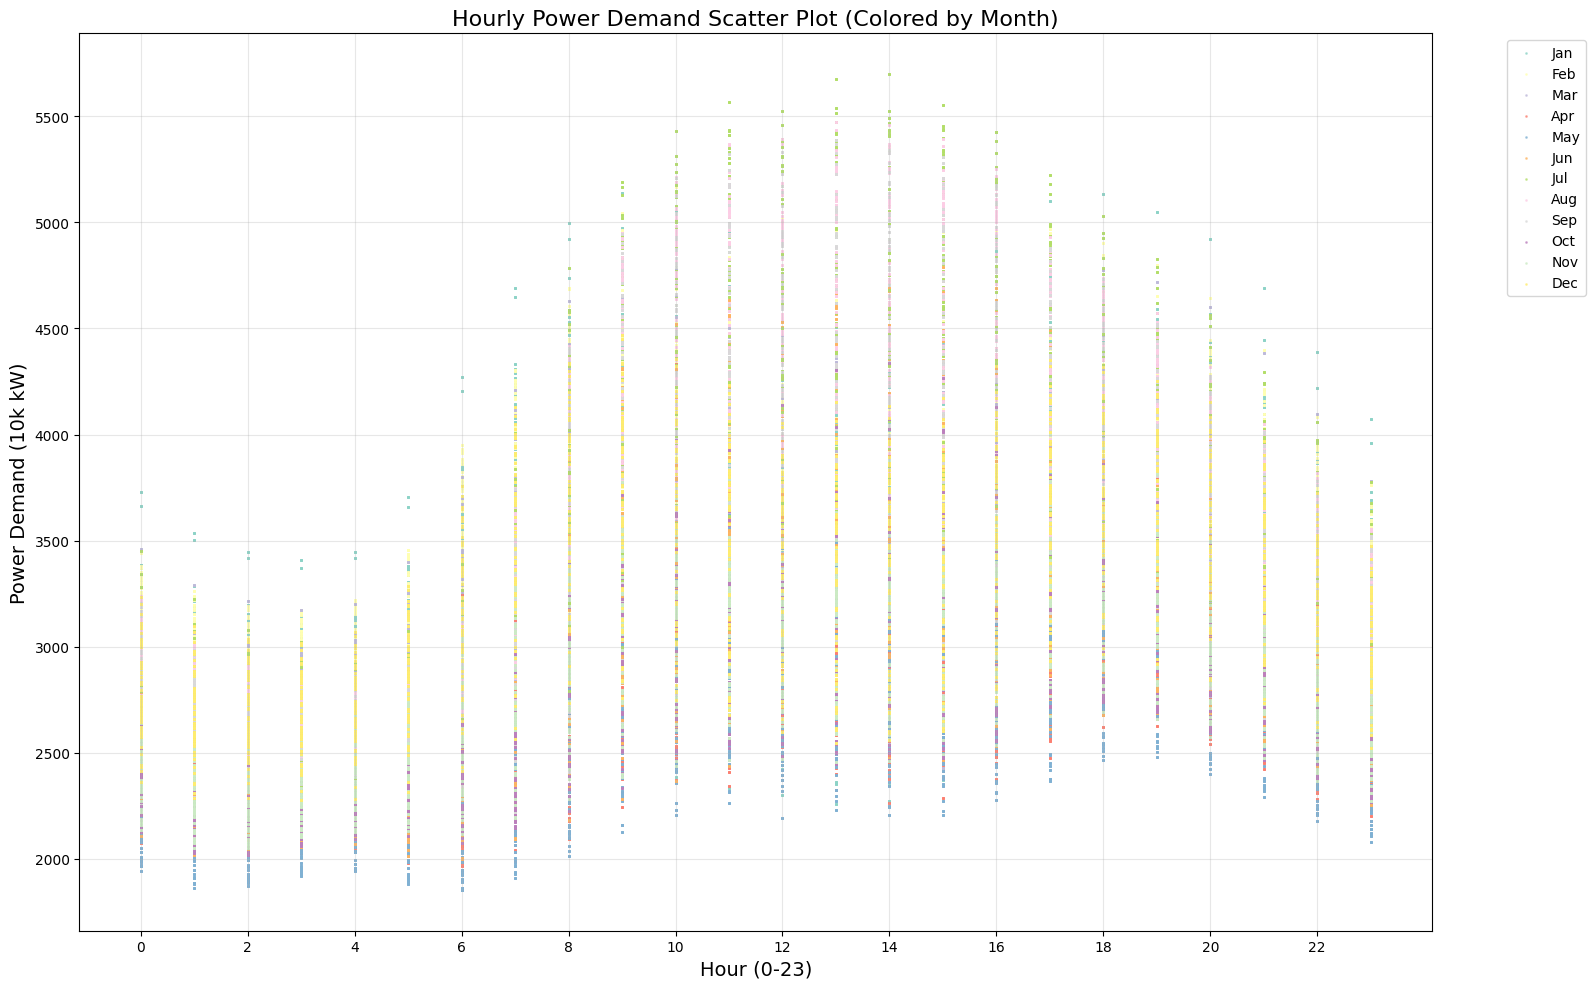

In [6]:
# 時間x電力の散布図（月別色分け）- 修正版
plt.figure(figsize=(16, 10))

# 月別に色を設定（正しいカラーマップ名）
colors = plt.cm.Set3(np.linspace(0, 1, 12))  # tab12 → Set3 に修正
# または plt.cm.tab10 を使って10色で循環
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# 各月のデータを散布図で表示
for month in range(1, 13):
    month_data = df[df['month'] == month]
    plt.scatter(month_data['hour'], month_data['actual_power'], 
               c=[colors[month-1]], alpha=0.6, s=1, 
               label=f'{month_names[month-1]}')

plt.xlabel('Hour (0-23)', fontsize=14)
plt.ylabel('Power Demand (10k kW)', fontsize=14)
plt.title('Hourly Power Demand Scatter Plot (Colored by Month)', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))

# レイアウト調整
plt.tight_layout()
plt.show()

表示対象月: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


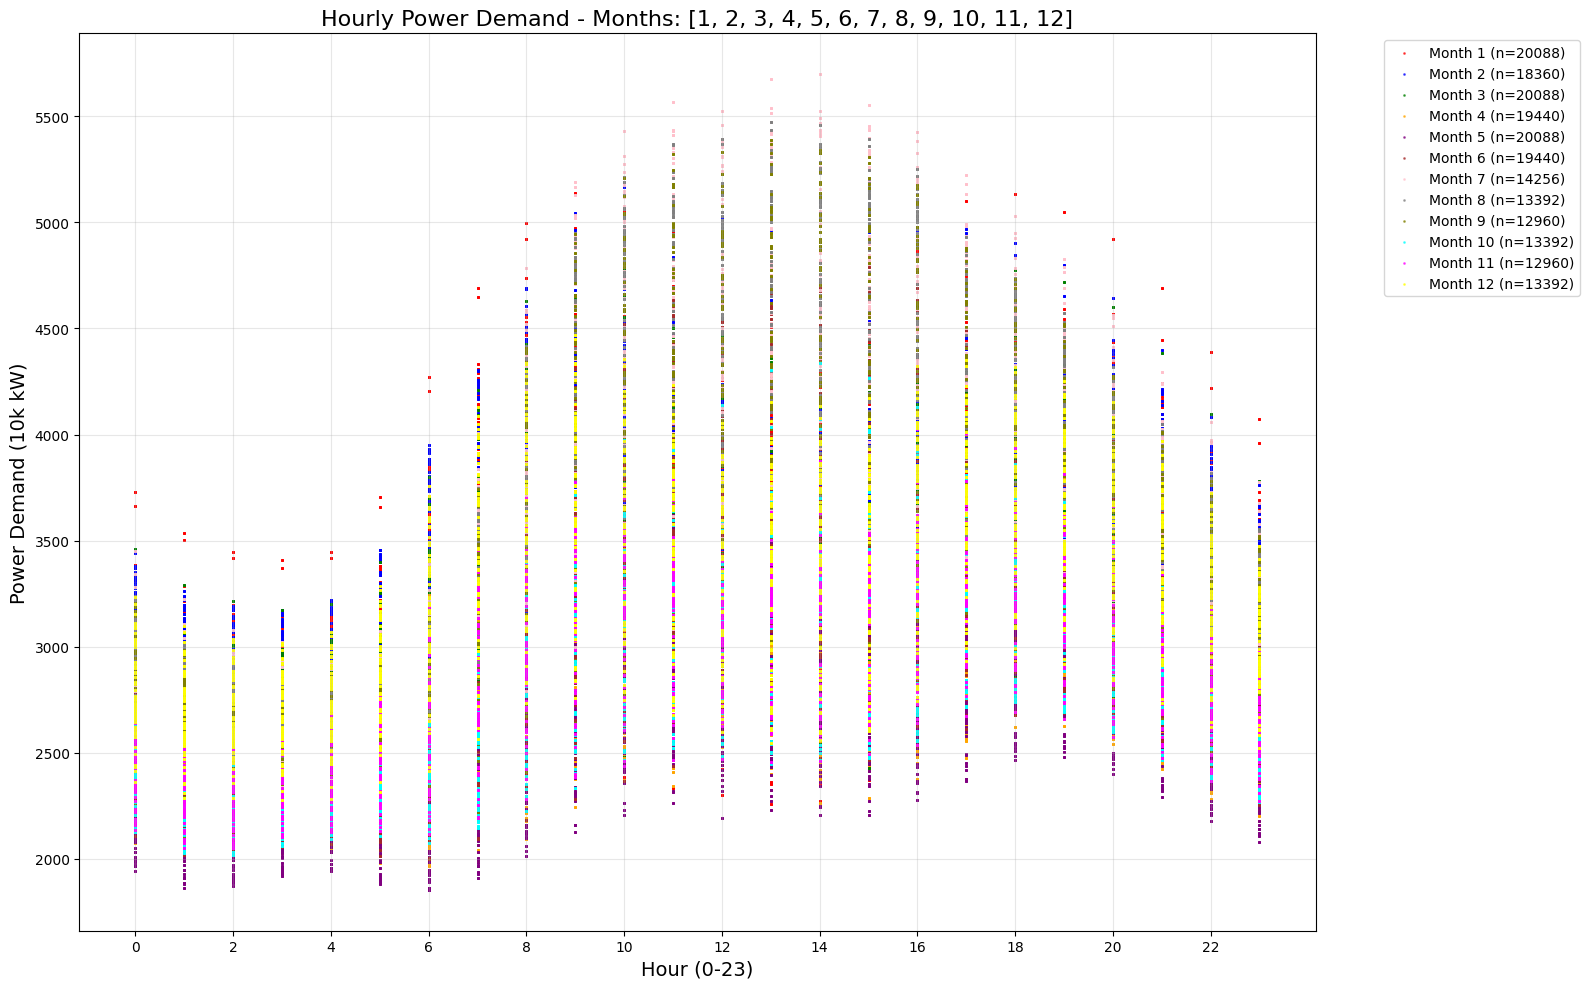


=== 選択月の統計情報 ===
データ数: 197,856 レコード
需要範囲: 1853 - 5699 万kW
平均需要: 3171 万kW

=== 月別詳細統計 ===
Month  1 (    red): 3506±574 万kW [2229-5137] (n=20088)
Month  2 (   blue): 3504±537 万kW [2311-5179] (n=18360)
Month  3 (  green): 3090±520 万kW [2086-4837] (n=20088)
Month  4 ( orange): 2701±398 万kW [1948-4339] (n=19440)
Month  5 ( purple): 2619±418 万kW [1853-3805] (n=20088)
Month  6 (  brown): 3006±625 万kW [2000-4812] (n=19440)
Month  7 (   pink): 3715±868 万kW [2240-5699] (n=14256)
Month  8 (   gray): 3774±823 万kW [2400-5475] (n=13392)
Month  9 (  olive): 3465±804 万kW [2064-5390] (n=12960)
Month 10 (   cyan): 2780±458 万kW [2016-4335] (n=13392)
Month 11 (magenta): 2880±423 万kW [2051-4024] (n=12960)
Month 12 ( yellow): 3289±490 万kW [2279-4469] (n=13392)


In [7]:
# 月の配列定義（簡単に変更可能）
selected_months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # 全月表示
# selected_months = [1, 2, 12]      # 冬季のみ
# selected_months = [6, 7, 8]       # 夏季のみ
# selected_months = [3, 4, 5, 9, 10, 11]  # 春秋のみ

print(f"表示対象月: {selected_months}")

# 月と色の固定マッピング（1月=赤、2月=青、...12月=黄色で常に固定）
month_color_map = {
    1: 'red',      2: 'blue',     3: 'green',    4: 'orange',
    5: 'purple',   6: 'brown',    7: 'pink',     8: 'gray',
    9: 'olive',    10: 'cyan',    11: 'magenta', 12: 'yellow'
}

# 時間x電力の散布図（選択月のみ、色固定）
plt.figure(figsize=(16, 10))

# 選択された月のデータのみを散布図で表示（色は常に同じ月=同じ色）
for month in selected_months:
    month_data = df[df['month'] == month]
    data_count = len(month_data)
    plt.scatter(month_data['hour'], month_data['actual_power'], 
               c=month_color_map[month], alpha=0.6, s=1, 
               label=f'Month {month} (n={data_count})')

plt.xlabel('Hour (0-23)', fontsize=14)
plt.ylabel('Power Demand (10k kW)', fontsize=14)
plt.title(f'Hourly Power Demand - Months: {selected_months}', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()

# 選択月の統計情報
selected_data = df[df['month'].isin(selected_months)]
print(f"\n=== 選択月の統計情報 ===")
print(f"データ数: {len(selected_data):,} レコード")
print(f"需要範囲: {selected_data['actual_power'].min():.0f} - {selected_data['actual_power'].max():.0f} 万kW")
print(f"平均需要: {selected_data['actual_power'].mean():.0f} 万kW")

# 月別詳細統計
print(f"\n=== 月別詳細統計 ===")
for month in selected_months:
    month_data = df[df['month'] == month]['actual_power']
    color = month_color_map[month]
    print(f"Month {month:2d} ({color:>7}): {month_data.mean():.0f}±{month_data.std():.0f} 万kW "
          f"[{month_data.min():.0f}-{month_data.max():.0f}] (n={len(month_data)})")

In [9]:
from matplotlib.backends.backend_pdf import PdfPages

# 月と色の固定マッピング
month_color_map = {
    1: 'red',      2: 'blue',     3: 'green',    4: 'orange',
    5: 'purple',   6: 'brown',    7: 'pink',     8: 'gray',
    9: 'olive',    10: 'cyan',    11: 'magenta', 12: 'yellow'
}

# PDFファイル作成
with PdfPages('monthly_power_demand_individual.pdf') as pdf:
    
    # 各月の個別フィギュア作成
    for month in range(1, 13):
        month_data = df[df['month'] == month]
        
        if len(month_data) == 0:
            print(f"Month {month}: No data available")
            continue
        
        # 新しい図を作成
        fig, ax = plt.subplots(figsize=(14, 8))
        
        # その月のデータのみ散布図
        ax.scatter(month_data['hour'], month_data['actual_power'], 
                   c=month_color_map[month], alpha=0.7, s=2)
        
        ax.set_xlabel('Hour (0-23)', fontsize=14)
        ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
        ax.set_title(f'Month {month} - Hourly Power Demand Pattern\n'
                    f'Mean: {month_data["actual_power"].mean():.0f}±{month_data["actual_power"].std():.0f} kW '
                    f'(n={len(month_data):,})', fontsize=16)
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(0, 24, 2))
        
        # Y軸の範囲を統一（全月比較しやすく）
        ax.set_ylim(df['actual_power'].min() - 100, df['actual_power'].max() + 100)
        
        plt.tight_layout()
        
        # PDFに追加
        pdf.savefig(fig, bbox_inches='tight')
        
        # メモリ節約のため図を閉じる
        plt.close(fig)
        
        print(f"✅ Month {month} 図をPDFに追加")

print(f"\n🎉 完了！12ヶ月の図を 'monthly_power_demand_individual.pdf' に保存しました")

✅ Month 1 図をPDFに追加
✅ Month 2 図をPDFに追加
✅ Month 3 図をPDFに追加
✅ Month 4 図をPDFに追加
✅ Month 5 図をPDFに追加
✅ Month 6 図をPDFに追加
✅ Month 7 図をPDFに追加
✅ Month 8 図をPDFに追加
✅ Month 9 図をPDFに追加
✅ Month 10 図をPDFに追加
✅ Month 11 図をPDFに追加
✅ Month 12 図をPDFに追加

🎉 完了！12ヶ月の図を 'monthly_power_demand_individual.pdf' に保存しました


In [3]:
# データ読み込み
df = pd.read_csv(r'C:\Users\tetsu\dev\energy-env\data\exploration\power_analysis.csv')

# 気温ランク作成
df['temp_rank'] = pd.cut(df['temperature_2m'], 
                        bins=[-30, 5, 15, 25, 30, 50], 
                        labels=['極寒(<5℃)', '寒い(5-15℃)', '快適(15-25℃)', 
                               '暑い(25-30℃)', '猛暑(>30℃)'])

print("気温ランク別データ数:")
print(df['temp_rank'].value_counts())

気温ランク別データ数:
temp_rank
快適(15-25℃)    69408
寒い(5-15℃)     64088
極寒(<5℃)       30141
暑い(25-30℃)    25201
猛暑(>30℃)       9018
Name: count, dtype: int64


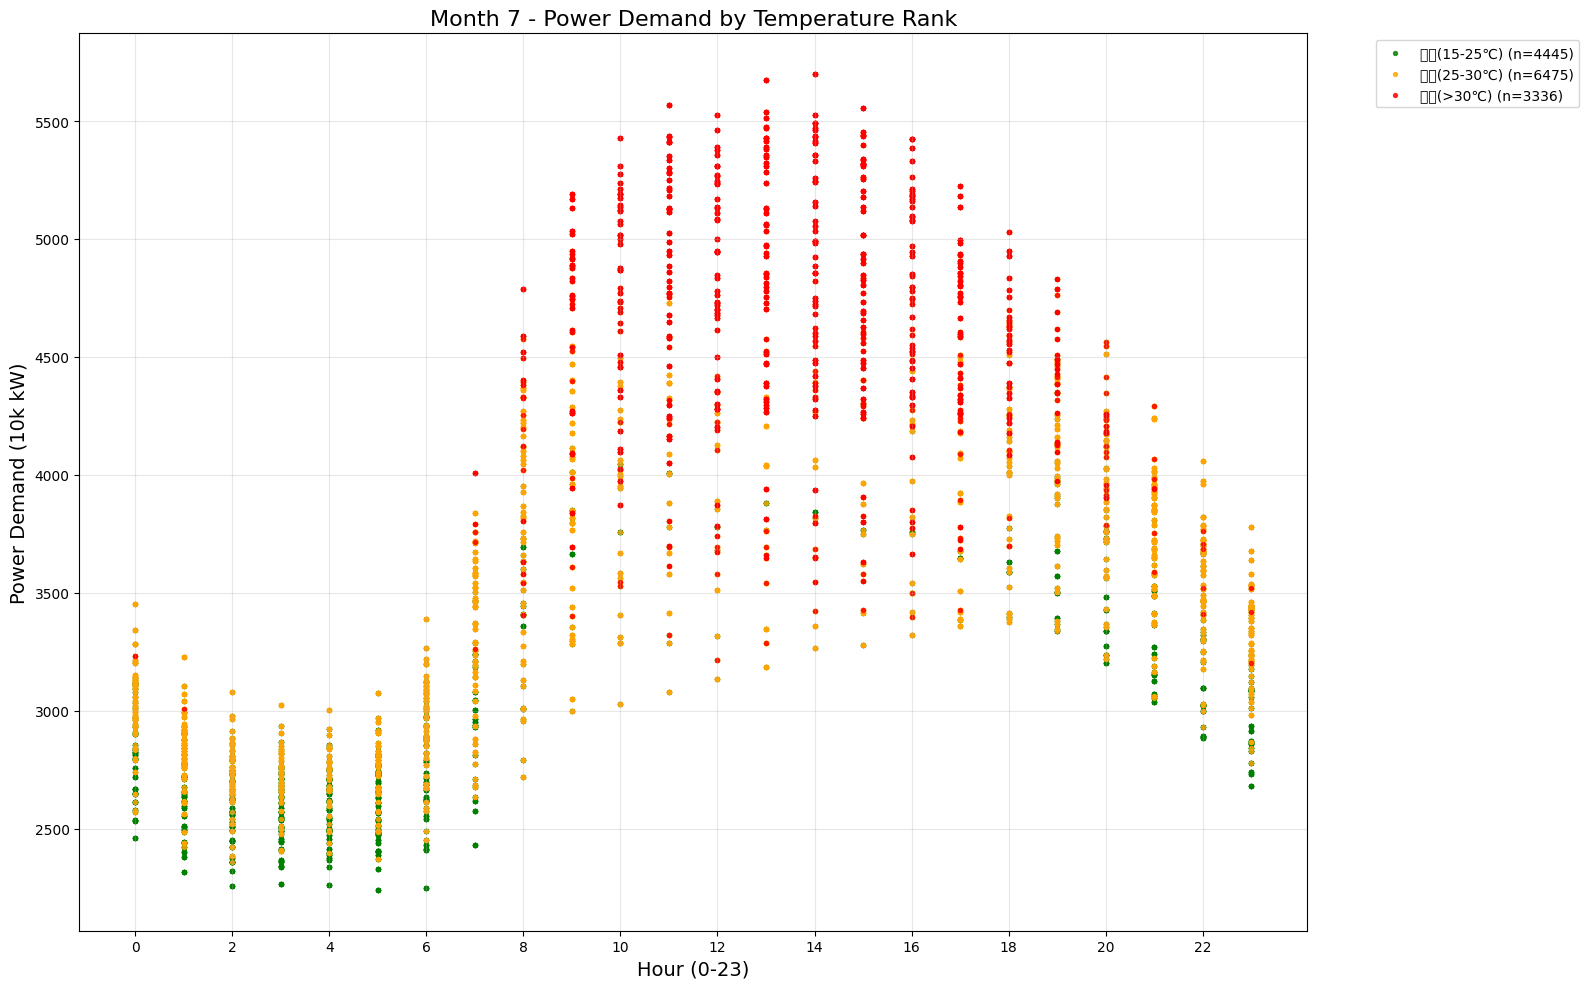


=== 7月の気温ランク別統計 ===
快適(15-25℃): 2942±467 万kW [2240-4899] (n=4445)
暑い(25-30℃): 3697±630 万kW [2360-5490] (n=6475)
  猛暑(>30℃): 4782±473 万kW [3006-5699] (n=3336)


In [5]:
# 7月データで気温による需要レンジの検証（改良版）
target_month = 7
month_data = df[df['month'] == target_month].copy()

# より区別しやすい色系統
temp_colors = {
    '極寒(<5℃)': 'navy',       # 濃い青
    '寒い(5-15℃)': 'blue',     # 青  
    '快適(15-25℃)': 'green',   # 緑
    '暑い(25-30℃)': 'orange',  # オレンジ
    '猛暑(>30℃)': 'red'        # 赤
}

plt.figure(figsize=(16, 10))

for temp_rank in ['極寒(<5℃)', '寒い(5-15℃)', '快適(15-25℃)', '暑い(25-30℃)', '猛暑(>30℃)']:
    temp_data = month_data[month_data['temp_rank'] == temp_rank]
    if len(temp_data) > 0:
        plt.scatter(temp_data['hour'], temp_data['actual_power'], 
                   c=temp_colors[temp_rank], alpha=0.8, s=8,  # マーカーサイズ 3→8
                   label=f'{temp_rank} (n={len(temp_data)})')

plt.xlabel('Hour (0-23)', fontsize=14)
plt.ylabel('Power Demand (10k kW)', fontsize=14)
plt.title(f'Month {target_month} - Power Demand by Temperature Rank', fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()

# 気温ランク別統計
print(f"\n=== {target_month}月の気温ランク別統計 ===")
for temp_rank in ['極寒(<5℃)', '寒い(5-15℃)', '快適(15-25℃)', '暑い(25-30℃)', '猛暑(>30℃)']:
    temp_data = month_data[month_data['temp_rank'] == temp_rank]['actual_power']
    if len(temp_data) > 0:
        print(f"{temp_rank:>10}: {temp_data.mean():.0f}±{temp_data.std():.0f} 万kW "
              f"[{temp_data.min():.0f}-{temp_data.max():.0f}] (n={len(temp_data)})")

In [6]:
from matplotlib.backends.backend_pdf import PdfPages

# 気温ランク別色マッピング（統一）
temp_colors = {
    '極寒(<5℃)': 'darkblue',   
    '寒い(5-15℃)': 'cyan',     
    '快適(15-25℃)': 'lime',    
    '暑い(25-30℃)': 'gold',    
    '猛暑(>30℃)': 'crimson'
}

# PDFファイル作成
with PdfPages('monthly_power_demand_by_temperature.pdf') as pdf:
    
    # 各月の気温ランク別散布図作成
    for month in range(1, 13):
        month_data = df[df['month'] == month].copy()
        
        if len(month_data) == 0:
            print(f"Month {month}: No data available")
            continue
        
        # 新しい図を作成
        fig, ax = plt.subplots(figsize=(16, 10))
        
        # 気温ランク別散布図
        for temp_rank in ['極寒(<5℃)', '寒い(5-15℃)', '快適(15-25℃)', '暑い(25-30℃)', '猛暑(>30℃)']:
            temp_data = month_data[month_data['temp_rank'] == temp_rank]
            if len(temp_data) > 0:
                ax.scatter(temp_data['hour'], temp_data['actual_power'], 
                          c=temp_colors[temp_rank], alpha=0.8, s=8,
                          label=f'{temp_rank} (n={len(temp_data)})')
        
        ax.set_xlabel('Hour (0-23)', fontsize=14)
        ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
        ax.set_title(f'Month {month} - Power Demand by Temperature Rank\n'
                    f'Total: {len(month_data):,} records', fontsize=16)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(0, 24, 2))
        
        # Y軸の範囲を統一（全月比較しやすく）
        ax.set_ylim(df['actual_power'].min() - 100, df['actual_power'].max() + 100)
        
        plt.tight_layout()
        
        # PDFに追加
        pdf.savefig(fig, bbox_inches='tight')
        
        # メモリ節約のため図を閉じる
        plt.close(fig)
        
        print(f"✅ Month {month} 気温ランク別散布図をPDFに追加")

print(f"\n🎉 完了！12ヶ月の気温ランク別散布図を 'monthly_power_demand_by_temperature.pdf' に保存しました")

✅ Month 1 気温ランク別散布図をPDFに追加
✅ Month 2 気温ランク別散布図をPDFに追加
✅ Month 3 気温ランク別散布図をPDFに追加
✅ Month 4 気温ランク別散布図をPDFに追加
✅ Month 5 気温ランク別散布図をPDFに追加
✅ Month 6 気温ランク別散布図をPDFに追加
✅ Month 7 気温ランク別散布図をPDFに追加
✅ Month 8 気温ランク別散布図をPDFに追加
✅ Month 9 気温ランク別散布図をPDFに追加
✅ Month 10 気温ランク別散布図をPDFに追加
✅ Month 11 気温ランク別散布図をPDFに追加
✅ Month 12 気温ランク別散布図をPDFに追加

🎉 完了！12ヶ月の気温ランク別散布図を 'monthly_power_demand_by_temperature.pdf' に保存しました


In [7]:
from matplotlib.backends.backend_pdf import PdfPages

# 細かい気温ランク作成（9段階）
df['temp_rank_fine'] = pd.cut(df['temperature_2m'], 
                             bins=[-50, 0, 5, 10, 15, 20, 25, 30, 35, 50], 
                             labels=['≤0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '>35'])

# 気温ランク別データ数確認
print("細かい気温ランク別データ数:")
print(df['temp_rank_fine'].value_counts().sort_index())

# より区別しやすい9色設定
temp_colors_fine = {
    '≤0': 'navy',       # 濃紺
    '1-5': 'blue',      # 青
    '6-10': 'cyan',     # シアン
    '11-15': 'lightgreen', # 薄緑
    '16-20': 'lime',    # ライム
    '21-25': 'yellow',  # 黄色
    '26-30': 'orange',  # オレンジ
    '31-35': 'red',     # 赤
    '>35': 'darkred'    # 濃赤
}

# PDFファイル作成
with PdfPages('monthly_power_demand_by_fine_temperature.pdf') as pdf:
    
    # 各月の細かい気温ランク別散布図作成
    for month in range(1, 13):
        month_data = df[df['month'] == month].copy()
        
        if len(month_data) == 0:
            print(f"Month {month}: No data available")
            continue
        
        # 新しい図を作成
        fig, ax = plt.subplots(figsize=(18, 10))
        
        # 細かい気温ランク別散布図
        for temp_rank in ['≤0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '>35']:
            temp_data = month_data[month_data['temp_rank_fine'] == temp_rank]
            if len(temp_data) > 0:
                ax.scatter(temp_data['hour'], temp_data['actual_power'], 
                          c=temp_colors_fine[temp_rank], alpha=0.8, s=6,
                          label=f'{temp_rank}℃ (n={len(temp_data)})')
        
        ax.set_xlabel('Hour (0-23)', fontsize=14)
        ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
        ax.set_title(f'Month {month} - Power Demand by Fine Temperature Rank\n'
                    f'Total: {len(month_data):,} records', fontsize=16)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(0, 24, 2))
        
        # Y軸の範囲を統一（全月比較しやすく）
        ax.set_ylim(df['actual_power'].min() - 100, df['actual_power'].max() + 100)
        
        plt.tight_layout()
        
        # PDFに追加
        pdf.savefig(fig, bbox_inches='tight')
        
        # メモリ節約のため図を閉じる
        plt.close(fig)
        
        print(f"✅ Month {month} 細かい気温ランク別散布図をPDFに追加")

print(f"\n🎉 完了！12ヶ月の細かい気温ランク別散布図を 'monthly_power_demand_by_fine_temperature.pdf' に保存しました")

細かい気温ランク別データ数:
temp_rank_fine
≤0        6587
1-5      23554
6-10     31932
11-15    32156
16-20    34563
21-25    34845
26-30    25201
31-35     8419
>35        599
Name: count, dtype: int64
✅ Month 1 細かい気温ランク別散布図をPDFに追加
✅ Month 2 細かい気温ランク別散布図をPDFに追加
✅ Month 3 細かい気温ランク別散布図をPDFに追加
✅ Month 4 細かい気温ランク別散布図をPDFに追加
✅ Month 5 細かい気温ランク別散布図をPDFに追加
✅ Month 6 細かい気温ランク別散布図をPDFに追加
✅ Month 7 細かい気温ランク別散布図をPDFに追加
✅ Month 8 細かい気温ランク別散布図をPDFに追加
✅ Month 9 細かい気温ランク別散布図をPDFに追加
✅ Month 10 細かい気温ランク別散布図をPDFに追加
✅ Month 11 細かい気温ランク別散布図をPDFに追加
✅ Month 12 細かい気温ランク別散布図をPDFに追加

🎉 完了！12ヶ月の細かい気温ランク別散布図を 'monthly_power_demand_by_fine_temperature.pdf' に保存しました


In [7]:
from matplotlib.backends.backend_pdf import PdfPages

# 細かい気温ランク作成（9段階）
df['temp_rank_fine'] = pd.cut(df['temperature_2m'], 
                             bins=[-50, 0, 5, 10, 15, 20, 25, 30, 35, 50], 
                             labels=['≤0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '>35'])

# 気温ランク別データ数確認
print("細かい気温ランク別データ数:")
print(df['temp_rank_fine'].value_counts().sort_index())

# より区別しやすい9色設定
temp_colors_fine = {
    '≤0': 'navy',       # 濃紺
    '1-5': 'blue',      # 青
    '6-10': 'cyan',     # シアン
    '11-15': 'lightgreen', # 薄緑
    '16-20': 'lime',    # ライム
    '21-25': 'yellow',  # 黄色
    '26-30': 'orange',  # オレンジ
    '31-35': 'red',     # 赤
    '>35': 'darkred'    # 濃赤
}

# PDFファイル作成
with PdfPages('monthly_power_demand_by_fine_temperature.pdf') as pdf:
    
    # 各月の細かい気温ランク別散布図作成
    for month in range(1, 13):
        month_data = df[df['month'] == month].copy()
        
        if len(month_data) == 0:
            print(f"Month {month}: No data available")
            continue
        
        # 新しい図を作成
        fig, ax = plt.subplots(figsize=(18, 10))
        
        # 細かい気温ランク別散布図
        for temp_rank in ['≤0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '>35']:
            temp_data = month_data[month_data['temp_rank_fine'] == temp_rank]
            if len(temp_data) > 0:
                ax.scatter(temp_data['hour'], temp_data['actual_power'], 
                          c=temp_colors_fine[temp_rank], alpha=0.8, s=6,
                          label=f'{temp_rank}℃ (n={len(temp_data)})')
        
        ax.set_xlabel('Hour (0-23)', fontsize=14)
        ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
        ax.set_title(f'Month {month} - Power Demand by Fine Temperature Rank\n'
                    f'Total: {len(month_data):,} records', fontsize=16)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(0, 24, 2))
        
        # Y軸の範囲を統一（全月比較しやすく）
        ax.set_ylim(df['actual_power'].min() - 100, df['actual_power'].max() + 100)
        
        plt.tight_layout()
        
        # PDFに追加
        pdf.savefig(fig, bbox_inches='tight')
        
        # メモリ節約のため図を閉じる
        plt.close(fig)
        
        print(f"✅ Month {month} 細かい気温ランク別散布図をPDFに追加")

print(f"\n🎉 完了！12ヶ月の細かい気温ランク別散布図を 'monthly_power_demand_by_fine_temperature.pdf' に保存しました")

細かい気温ランク別データ数:
temp_rank_fine
≤0        6587
1-5      23554
6-10     31932
11-15    32156
16-20    34563
21-25    34845
26-30    25201
31-35     8419
>35        599
Name: count, dtype: int64
✅ Month 1 細かい気温ランク別散布図をPDFに追加
✅ Month 2 細かい気温ランク別散布図をPDFに追加
✅ Month 3 細かい気温ランク別散布図をPDFに追加
✅ Month 4 細かい気温ランク別散布図をPDFに追加
✅ Month 5 細かい気温ランク別散布図をPDFに追加
✅ Month 6 細かい気温ランク別散布図をPDFに追加
✅ Month 7 細かい気温ランク別散布図をPDFに追加
✅ Month 8 細かい気温ランク別散布図をPDFに追加
✅ Month 9 細かい気温ランク別散布図をPDFに追加
✅ Month 10 細かい気温ランク別散布図をPDFに追加
✅ Month 11 細かい気温ランク別散布図をPDFに追加
✅ Month 12 細かい気温ランク別散布図をPDFに追加

🎉 完了！12ヶ月の細かい気温ランク別散布図を 'monthly_power_demand_by_fine_temperature.pdf' に保存しました


In [10]:
# 気温ランク別フィギュア作成（純粋散布図のみ）

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# 気温ランク色設定
temp_colors_fine = {
    '≤0': 'navy',       # 濃紺
    '1-5': 'blue',      # 青
    '6-10': 'cyan',     # シアン
    '11-15': 'lightgreen', # 薄緑
    '16-20': 'lime',    # ライム
    '21-25': 'yellow',  # 黄色
    '26-30': 'orange',  # オレンジ
    '31-35': 'red',     # 赤
    '>35': 'darkred'    # 濃赤
}

# 気温ランク順序（データ数順ではなく温度順）
temp_ranks_ordered = ['≤0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '>35']

print("🔄 気温ランク別散布図作成開始...")

# PDFファイル作成
with PdfPages('power_demand_by_temperature_ranks.pdf') as pdf:
    
    # 各気温ランク別にフィギュア作成
    for temp_rank in temp_ranks_ordered:
        # 該当気温ランクのデータを抽出
        temp_data = df[df['temp_rank_fine'] == temp_rank].copy()
        
        if len(temp_data) == 0:
            print(f"⚠️  {temp_rank}℃: データなし")
            continue
        
        # 新しい図を作成
        fig, ax = plt.subplots(figsize=(18, 10))
        
        # 散布図のみ作成
        ax.scatter(temp_data['hour'], temp_data['actual_power'], 
                  c=temp_colors_fine[temp_rank], alpha=0.6, s=8)
        
        # グラフ設定
        ax.set_xlabel('Hour (0-23)', fontsize=14)
        ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
        ax.set_title(f'Power Demand Pattern: {temp_rank}℃ Range\n'
                    f'Total: {len(temp_data):,} records', fontsize=16)
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(0, 24, 2))
        
        # Y軸を該当気温ランクに最適化
        y_margin = (temp_data['actual_power'].max() - temp_data['actual_power'].min()) * 0.05
        y_min = temp_data['actual_power'].min() - y_margin
        y_max = temp_data['actual_power'].max() + y_margin
        ax.set_ylim(y_min, y_max)
        
        plt.tight_layout()
        
        # PDFに追加
        pdf.savefig(fig, bbox_inches='tight')
        
        # メモリ節約のため図を閉じる
        plt.close(fig)
        
        print(f"✅ {temp_rank}℃: {len(temp_data):,}件の散布図作成完了")

print(f"\n🎉 完了！気温ランク別散布図を 'power_demand_by_temperature_ranks.pdf' に保存しました")
print(f"📊 純粋な分布パターンを図として確認してください")

🔄 気温ランク別散布図作成開始...
✅ ≤0℃: 6,587件の散布図作成完了
✅ 1-5℃: 23,554件の散布図作成完了
✅ 6-10℃: 31,932件の散布図作成完了
✅ 11-15℃: 32,156件の散布図作成完了
✅ 16-20℃: 34,563件の散布図作成完了
✅ 21-25℃: 34,845件の散布図作成完了
✅ 26-30℃: 25,201件の散布図作成完了
✅ 31-35℃: 8,419件の散布図作成完了
✅ >35℃: 599件の散布図作成完了

🎉 完了！気温ランク別散布図を 'power_demand_by_temperature_ranks.pdf' に保存しました
📊 純粋な分布パターンを図として確認してください


In [13]:
# 気温ランク別フィギュア作成（純粋散布図のみ）

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# 気温ランク色設定
temp_colors_fine = {
    '≤0': 'navy',       # 濃紺
    '1-5': 'blue',      # 青
    '6-10': 'cyan',     # シアン
    '11-15': 'lightgreen', # 薄緑
    '16-20': 'lime',    # ライム
    '21-25': 'yellow',  # 黄色
    '26-30': 'orange',  # オレンジ
    '31-35': 'red',     # 赤
    '>35': 'darkred'    # 濃赤
}

# 気温ランク順序（データ数順ではなく温度順）
temp_ranks_ordered = ['≤0', '1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '>35']

print("🔄 気温ランク×祝日別散布図作成開始...")

# PDFファイル作成（新しいファイル名）
with PdfPages('temp_holiday_analysis.pdf') as pdf:
    
    # 各気温ランク別にフィギュア作成（平日・祝日分離）
    for temp_rank in temp_ranks_ordered:
        # 該当気温ランクのデータを抽出
        temp_data = df[df['temp_rank_fine'] == temp_rank].copy()
        
        if len(temp_data) == 0:
            print(f"⚠️  {temp_rank}℃: データなし")
            continue
        
        # 平日・祝日で分割
        workday_data = temp_data[temp_data['is_holiday'] == False]
        holiday_data = temp_data[temp_data['is_holiday'] == True]
        
        # 平日用フィギュア
        if len(workday_data) > 0:
            fig, ax = plt.subplots(figsize=(18, 10))
            
            ax.scatter(workday_data['hour'], workday_data['actual_power'], 
                      c=temp_colors_fine[temp_rank], alpha=0.7, s=8)
            
            ax.set_xlabel('Hour (0-23)', fontsize=14)
            ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
            ax.set_title(f'Power Demand Pattern: {temp_rank}℃ Range - WORKDAY\n'
                        f'Total: {len(workday_data):,} records', fontsize=16)
            ax.grid(True, alpha=0.3)
            ax.set_xticks(range(0, 24, 2))
            
            # Y軸を全体データに合わせて統一
            y_margin = (temp_data['actual_power'].max() - temp_data['actual_power'].min()) * 0.05
            y_min = temp_data['actual_power'].min() - y_margin
            y_max = temp_data['actual_power'].max() + y_margin
            ax.set_ylim(y_min, y_max)
            
            plt.tight_layout()
            pdf.savefig(fig, bbox_inches='tight')
            plt.close(fig)
            
            print(f"✅ {temp_rank}℃ 平日: {len(workday_data):,}件")
        
        # 祝日用フィギュア
        if len(holiday_data) > 0:
            fig, ax = plt.subplots(figsize=(18, 10))
            
            ax.scatter(holiday_data['hour'], holiday_data['actual_power'], 
                      c=temp_colors_fine[temp_rank], alpha=0.7, s=8)
            
            ax.set_xlabel('Hour (0-23)', fontsize=14)
            ax.set_ylabel('Power Demand (10k kW)', fontsize=14)
            ax.set_title(f'Power Demand Pattern: {temp_rank}℃ Range - HOLIDAY\n'
                        f'Total: {len(holiday_data):,} records', fontsize=16)
            ax.grid(True, alpha=0.3)
            ax.set_xticks(range(0, 24, 2))
            
            # Y軸を全体データに合わせて統一（比較しやすく）
            y_margin = (temp_data['actual_power'].max() - temp_data['actual_power'].min()) * 0.05
            y_min = temp_data['actual_power'].min() - y_margin
            y_max = temp_data['actual_power'].max() + y_margin
            ax.set_ylim(y_min, y_max)
            
            plt.tight_layout()
            pdf.savefig(fig, bbox_inches='tight')
            plt.close(fig)
            
            print(f"✅ {temp_rank}℃ 祝日: {len(holiday_data):,}件")

print(f"\n🎉 完了！気温ランク×祝日別散布図を 'temp_holiday_analysis.pdf' に保存しました")
print(f"📊 18フィギュア（9気温ランク × 平日・祝日）で気温×祝日の交互作用を確認してください")
print(f"🔍 祝日の需要パターンが平日とどう違うかに注目！")

🔄 気温ランク×祝日別散布図作成開始...
✅ ≤0℃ 平日: 6,130件
✅ ≤0℃ 祝日: 457件
✅ 1-5℃ 平日: 22,011件
✅ 1-5℃ 祝日: 1,543件
✅ 6-10℃ 平日: 30,286件
✅ 6-10℃ 祝日: 1,646件
✅ 11-15℃ 平日: 30,322件
✅ 11-15℃ 祝日: 1,834件
✅ 16-20℃ 平日: 32,660件
✅ 16-20℃ 祝日: 1,903件
✅ 21-25℃ 平日: 33,035件
✅ 21-25℃ 祝日: 1,810件
✅ 26-30℃ 平日: 24,230件
✅ 26-30℃ 祝日: 971件
✅ 31-35℃ 平日: 8,057件
✅ 31-35℃ 祝日: 362件
✅ >35℃ 平日: 541件
✅ >35℃ 祝日: 58件

🎉 完了！気温ランク×祝日別散布図を 'temp_holiday_analysis.pdf' に保存しました
📊 18フィギュア（9気温ランク × 平日・祝日）で気温×祝日の交互作用を確認してください
🔍 祝日の需要パターンが平日とどう違うかに注目！
